# Sin Filtro (TP2 Orga2)
## Experimentos de Niveles 💪💪
Vamos a probar a este muchacho...


In [1]:
print("Compilando código")
!cd ../src && make
!cp ../src/build/tp2 tp2
!cp -a ../src/img img

Compilando código
mkdir -p build
make -C helper
make[1]: Entering directory '/home/osboxes/Desktop/tp2/src/helper'
cc -ggdb -Wall -Wno-unused-parameter -Wextra -std=c99 -no-pie -pedantic -m64 -O0 -march=native bmpdiff.c ../build/libbmp.o ../build/imagenes.o ../build/utils.o -o ../build/bmpdiff
make[1]: Leaving directory '/home/osboxes/Desktop/tp2/src/helper'
make -C filters
make[1]: Entering directory '/home/osboxes/Desktop/tp2/src/filters'
nasm -felf64 -g -F dwarf -o ../build/Nivel_asm.o Nivel_asm.asm
make[1]: Leaving directory '/home/osboxes/Desktop/tp2/src/filters'
cc -ggdb -Wall -Wno-unused-parameter -Wextra -std=c99 -no-pie -pedantic -m64 -O0 -march=native build/tp2.o build/cli.o build/libbmp.o build/imagenes.o build/utils.o build/Rombos.o build/Bordes.o build/Nivel.o build/Rombos_asm.o build/Bordes_asm.o build/Nivel_asm.o build/Rombos_c.o build/Bordes_c.o build/Nivel_c.o -o build/tp2 -lm


In [2]:
from subprocess import call, check_output
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

printmd("### Para ejecutar el programa")
printmd("usar: ```call([\"./tp2\", \"args\", \"to\", \"spa\"])```")
printmd("Ejemplo: ```call([\"./tp2\", \"Nivel\", \"-i\", \"asm\", \"img/puente.bmp\", \"7\"])```")
    
printmd("### ✨Además, tenemos unas hermosas tools para testeo")
printmd("Si hacemos iteraciones en algún test, podemos wrappear el range con ```logProgress```.")
printmd("\n**Ejemplo:** ```for i in logProgress(range(0, algo.size), name=\"Lo que representan mis índices\")```")
printmd("Esto es útil nada más para cosas que toman tiempo cuantificable :P (básicamente, no instantáneo)")

printmd("\nSi no nos interesa el output de una celda en particular (porque, por ejemplo, la usamos para carga de datos en el notebook), podemos ejecutar ```clear_output()\ndone()```")
printmd("al final de la misma.")

### Para ejecutar el programa

usar: ```call(["./tp2", "args", "to", "spa"])```

Ejemplo: ```call(["./tp2", "Nivel", "-i", "asm", "img/puente.bmp", "7"])```

### ✨Además, tenemos unas hermosas tools para testeo

Si hacemos iteraciones en algún test, podemos wrappear el range con ```logProgress```.


**Ejemplo:** ```for i in logProgress(range(0, algo.size), name="Lo que representan mis índices")```

Esto es útil nada más para cosas que toman tiempo cuantificable :P (básicamente, no instantáneo)


Si no nos interesa el output de una celda en particular (porque, por ejemplo, la usamos para carga de datos en el notebook), podemos ejecutar ```clear_output()
done()```

al final de la misma.

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output

/home/osboxes/Desktop/tp2/exp
Python 3.7.4


In [4]:
def logProgress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
        
def done():
    print("Done!\n\n✨\n  ⊂_ヽ\n 　 ＼＼ \n　　 ＼( ͡° ͜ʖ ͡°)\n　　　 >　⌒ヽ\n　　　/ 　 へ＼\n　　 /　　/　＼＼\n　　 ﾚ　ノ　　 ヽ_つ\n　　/　/\n　 /　/|\n　(　(ヽ\n　|　|、＼\n　| 丿 ＼ ⌒)\n　| | 　　) /\nノ )　　Lﾉ\n(_／)")
    
def rmse(errorCuadratico, n):
    return np.sqrt(1/n * errorCuadratico)

## Carga de Datos

In [9]:
# Para cada implementación de asm, quiero contrastarla con C
impls = ["c", "asm", "asm_mid", "asm_low", "asm_ultra_low"]
res = {"c": [], "c_o1": [], "c_o2": [], "c_o3": [], "asm": [], "asm_mid": [], "asm_low": [], "asm_ultra_low": []}
for impl in logProgress(impls, name="Implementación"):
    for i in logProgress(range(0, 100), name="Iteración"):
        pOutput = check_output(["./tp2", "Nivel", "-i", impl, "-t", "100", "img/puente.bmp", "7"]).decode("utf-8")
        # TODO: Filter here the output!
        cantCiclosCallMsg = "# de ciclos insumidos por llamada : "
        cantCiclosMsg = "# de ciclos insumidos totales     : "
        i = pOutput.index(cantCiclosMsg)
        j = pOutput.index(cantCiclosCallMsg)
        res[impl] += [int(pOutput[i + len(cantCiclosMsg):j].replace("\n", "").strip())]

clear_output()
cimpls = ["_o1", "_o2", "_o3"]
for impl in logProgress(cimpls, name="Implementación"):
    for i in logProgress(range(0, 100), name="Iteración"):
        pOutput = check_output(["./tp2" + impl, "Nivel", "-i", "c", "-t", "100", "img/puente.bmp", "7"]).decode("utf-8")
        # TODO: Filter here the output!
        cantCiclosCallMsg = "# de ciclos insumidos por llamada : "
        cantCiclosMsg = "# de ciclos insumidos totales     : "
        i = pOutput.index(cantCiclosMsg)
        j = pOutput.index(cantCiclosCallMsg)
        res["c" + impl] += [int(pOutput[i + len(cantCiclosMsg):j].replace("\n", "").strip())]
        
clear_output()
done()

Done!

✨
  ⊂_ヽ
 　 ＼＼ 
　　 ＼( ͡° ͜ʖ ͡°)
　　　 >　⌒ヽ
　　　/ 　 へ＼
　　 /　　/　＼＼
　　 ﾚ　ノ　　 ヽ_つ
　　/　/
　 /　/|
　(　(ヽ
　|　|、＼
　| 丿 ＼ ⌒)
　| | 　　) /
ノ )　　Lﾉ
(_／)


Text(0.5, 1.0, 'Ciclos de ejecución por tecnología')

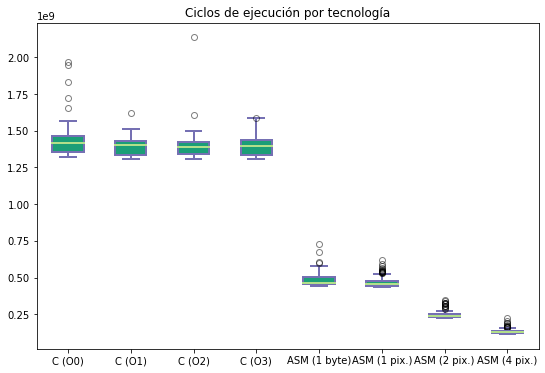

In [10]:
## Create boxplots
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

dataToPlot = [res["c"], res["c_o1"], res["c_o2"], res["c_o3"], res["asm_ultra_low"], res["asm_low"], res["asm_mid"], res["asm"]]

# Create the boxplot
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(dataToPlot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['C (O0)', 'C (O1)', 'C (O2)', 'C (O3)', 'ASM (1 byte)', 'ASM (1 pix.)', 'ASM (2 pix.)', 'ASM (4 pix.)'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_title("Ciclos de ejecución por tecnología")

Text(0.5, 1.0, 'Ciclos de ejecución por tecnología C')

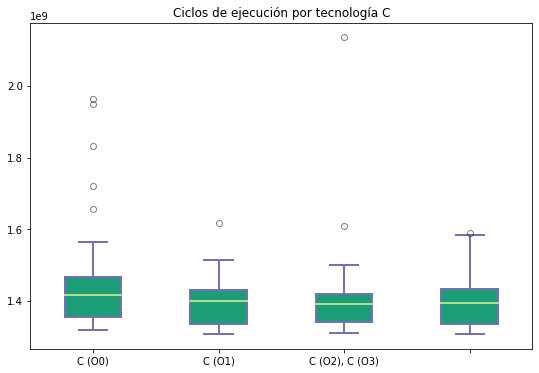

In [11]:
## Create boxplots
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

dataToPlot = [res["c"], res["c_o1"], res["c_o2"], res["c_o3"]]

# Create the boxplot
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(dataToPlot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['C (O0)', 'C (O1)', 'C (O2), C (O3)'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_title("Ciclos de ejecución por tecnología C")

Text(0.5, 1.0, 'Ciclos de ejecución por tecnología ASM')

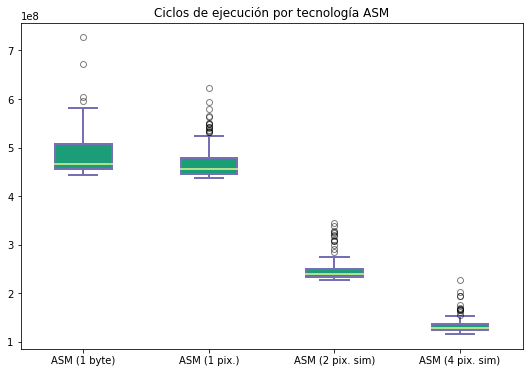

In [12]:
## Create boxplots
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

dataToPlot = [res["asm_ultra_low"], res["asm_low"], res["asm_mid"], res["asm"]]

# Create the boxplot
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(dataToPlot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['ASM (1 byte)', 'ASM (1 pix.)', 'ASM (2 pix. sim)', 'ASM (4 pix. sim)'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.set_title("Ciclos de ejecución por tecnología ASM")

0.5360561959919561
465164447.0
1416816415.0


[Text(0, 0, ''),
 Text(0, 0, 'C (O0)'),
 Text(0, 0, 'C (O1)'),
 Text(0, 0, 'C (O2)'),
 Text(0, 0, 'C (O3)'),
 Text(0, 0, 'ASM (1 B)'),
 Text(0, 0, 'ASM (1 P)'),
 Text(0, 0, 'ASM (2 P)'),
 Text(0, 0, 'ASM (4 P)')]

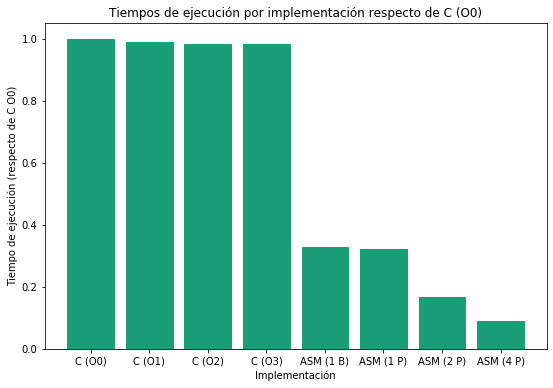

In [44]:
print(np.median(res["asm"])/np.median(res["asm_mid"]))
print(np.median(res["asm_ultra_low"]))
print(np.median(res["c"]))

div = np.median(res["c"])

dataToPlot = [
    np.median(res["c"]/div),
    np.median(res["c_o1"]/div),
    np.median(res["c_o2"]/div),
    np.median(res["c_o3"]/div),
    np.median(res["asm_ultra_low"]/div),
    np.median(res["asm_low"]/div),
    np.median(res["asm_mid"]/div),
    np.median(res["asm"]/div),
]
index = np.arange(len(dataToPlot))

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

b = ax.bar(index, dataToPlot)
ax.set_xlabel('Implementación')
ax.set_ylabel('Tiempo de ejecución (respecto de C O0)')
# plt.xticks(div, label, fontsize=5, rotation=30)
ax.set_title('Tiempos de ejecución por implementación respecto de C (O0)')

for bar in b:
    bar.set_color("#1b9e77")



ax.set_xticklabels(['', 'C (O0)', 'C (O1)', 'C (O2)', 'C (O3)', 'ASM (1 B)', 'ASM (1 P)', 'ASM (2 P)', 'ASM (4 P)'])